In [1]:
#importing the relevant modules 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


#ADD SENTENCES AFTER EACH SCATTER PLOT
#

In [2]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient countlen(cities)

In [5]:
#creating a new dataframe 
cities_pd=pd.DataFrame({"City": cities})
cities_pd.count()

City    609
dtype: int64

In [6]:
#adding new columns to the dataframe 
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Humidity"] = ""
cities_pd["Cloud Coverage"] = ""
cities_pd["Wind Speed"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""

In [7]:
#multiple soccuessive API calls, the print log loops back at 49, 
#similar to what was shown in the sample output
set=1
number=0

for index, row in cities_pd.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    place = row["City"]
    units = "imperial"
    query_url = f"{url}appid={weather_api_key}&units={units}&q={place}"
    weather_data=requests.get(query_url)
    response=weather_data.json()
    
    
   
    
    try:
        print(f'Processing Record {number} of Set {set} | {place}')
        cities_pd.loc[index, "Lat"] =(response['coord']['lat'])
        cities_pd.loc[index, "Lng"] =(response['coord']['lon'])
        cities_pd.loc[index, "Max Temp"] = (response['main']['temp_max'])
        cities_pd.loc[index, "Humidity"] = (response['main']['humidity'])
        cities_pd.loc[index, "Cloud Coverage"] = (response['clouds']['all'])
        cities_pd.loc[index, "Wind Speed"] = (response['wind']['speed'])
        cities_pd.loc[index, "Country"] = (response['sys']['country'])
        cities_pd.loc[index, "Date"] = (response['dt'])
    
    except (KeyError, IndexError):
        print("City not found. Skipping.")
    
    
    number=number +1
    
    if number==50:
        number=0
        set=set + 1
    
    




Processing Record 0 of Set 1 | bethel
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | marcona
City not found. Skipping.
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping.
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | cabo rojo
Processing Record 8 of Set 1 | padang
Processing Record 9 of Set 1 | peace river
Processing Record 10 of Set 1 | coihaique
Processing Record 11 of Set 1 | henties bay
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | nizhniy kuranakh
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | moose factory
Processing Record 16 of Set 1 | havoysund
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | nuzvid
Processing Record 20 of Set 1 | fort nelson
Processing Record 21 of Set 1 | dingle
Processing Record 22 of Set 1 | kudahu

Processing Record 37 of Set 4 | sampit
Processing Record 38 of Set 4 | mount gambier
Processing Record 39 of Set 4 | bar harbor
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping.
Processing Record 41 of Set 4 | airai
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | primorsk
Processing Record 44 of Set 4 | belushya guba
City not found. Skipping.
Processing Record 45 of Set 4 | sitka
Processing Record 46 of Set 4 | roald
Processing Record 47 of Set 4 | chuy
Processing Record 48 of Set 4 | severo-kurilsk
Processing Record 49 of Set 4 | lac du bonnet
Processing Record 0 of Set 5 | puerto ayora
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | taolanaro
City not found. Skipping.
Processing Record 4 of Set 5 | quepos
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | jiddah
City not found. Skipping.
Processing Record 7 of Set 5 | manono
Processing Record 8 of Set 5 

Processing Record 25 of Set 8 | longyearbyen
Processing Record 26 of Set 8 | ucluelet
Processing Record 27 of Set 8 | estevan
Processing Record 28 of Set 8 | olga
Processing Record 29 of Set 8 | kinlochleven
Processing Record 30 of Set 8 | gryfice
Processing Record 31 of Set 8 | gimli
Processing Record 32 of Set 8 | torbay
Processing Record 33 of Set 8 | simpang
Processing Record 34 of Set 8 | namie
Processing Record 35 of Set 8 | rodrigues alves
Processing Record 36 of Set 8 | ternate
Processing Record 37 of Set 8 | malibu
Processing Record 38 of Set 8 | chipinge
Processing Record 39 of Set 8 | rugby
Processing Record 40 of Set 8 | conde
Processing Record 41 of Set 8 | bargal
City not found. Skipping.
Processing Record 42 of Set 8 | san antonio
Processing Record 43 of Set 8 | nampula
Processing Record 44 of Set 8 | sechura
Processing Record 45 of Set 8 | khor
Processing Record 46 of Set 8 | macaubas
Processing Record 47 of Set 8 | nizwa
Processing Record 48 of Set 8 | charters towers


Processing Record 15 of Set 12 | karaul
City not found. Skipping.
Processing Record 16 of Set 12 | fort saint john
City not found. Skipping.
Processing Record 17 of Set 12 | rio grande
Processing Record 18 of Set 12 | warqla
City not found. Skipping.
Processing Record 19 of Set 12 | svetlyy
Processing Record 20 of Set 12 | trinidad
Processing Record 21 of Set 12 | lujan
Processing Record 22 of Set 12 | kushmurun
Processing Record 23 of Set 12 | marsa matruh
Processing Record 24 of Set 12 | maceio
Processing Record 25 of Set 12 | portland
Processing Record 26 of Set 12 | andenes
Processing Record 27 of Set 12 | rawson
Processing Record 28 of Set 12 | seoul
Processing Record 29 of Set 12 | joshimath
Processing Record 30 of Set 12 | kirensk
Processing Record 31 of Set 12 | caramay
Processing Record 32 of Set 12 | salalah
Processing Record 33 of Set 12 | shieli
Processing Record 34 of Set 12 | progreso
Processing Record 35 of Set 12 | kadambur
Processing Record 36 of Set 12 | luangwa
Proce

In [8]:
#saving oinitial utput to csv 
cities_pd.to_csv("Cities_Output.csv")


#getting rid of rows wuth blank output
cities_clean=cities_pd.loc[cities_pd["Lat"]!=""]

cities_clean=pd.DataFrame(cities_clean)

#mapping as float variable for all variables

cities_clean['Humidity'] = cities_clean['Humidity'].astype(float)


In [9]:
#Checking for the humidity

cities_humid=cities_clean.loc[cities_clean["Humidity"]>100]
cities_humid





,City,Lat,Lng,Max Temp,Humidity,Cloud Coverage,Wind Speed,Country,Date


In [10]:
#no cities greater than 100% humidity so map other variables to a float  

cities_clean['Lng'] = cities_clean['Lng'].astype(float)
cities_clean['Lat'] = cities_clean['Lat'].astype(float)
cities_clean['Max Temp'] = cities_clean['Max Temp'].astype(float)
cities_clean['Cloud Coverage'] = cities_clean['Cloud Coverage'].astype(float)
cities_clean['Wind Speed'] = cities_clean['Wind Speed'].astype(float)
cities_clean['Wind Speed'] = cities_clean['Wind Speed'].astype(float)


#Mapping clean file to csv 
cities_clean.to_csv("Cities_Output2.csv")


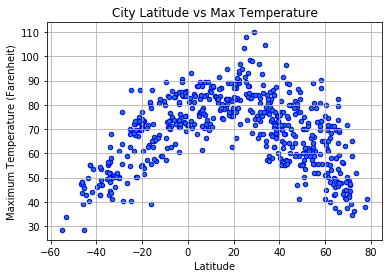

In [11]:
#Latitude vs  Max Temperature plot

fig, ax = plt.subplots()
cities_clean.plot(kind='scatter', x='Lat', y='Max Temp', ax=ax, edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Farenheit)")
plt.title("City Latitude vs Max Temperature" )

# Turn on the grid
ax.grid()
plt.savefig('Lat_MaxTemp.png')

plt.show()

The code above compares the latitude of cities with their maximum temperatures. As shown from the scatterplot above, the relationship between latititude and maximum temperature has a parabolic shape. In other words, cities with low and high latititudes tend to have low maximum temperatures, while cities with a latitude closer to 0 have a higher maximum temperature.  This makes intutive sense, as cities with a latitiude close to 0 would be closer to the equator and therefore have a higher maximum temperature. 

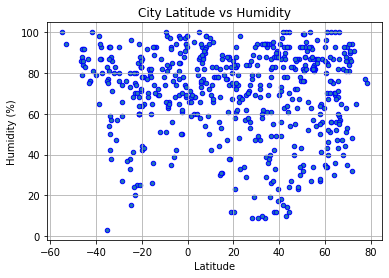

In [12]:
#Latitude vs Humidity Plot 
fig, ax = plt.subplots()
cities_clean.plot(kind='scatter', x='Lat', y='Humidity', ax=ax, edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity" )


# Turn on the grid
ax.grid()

plt.savefig('Lat_Humidity.png')

plt.show()

The code above compares the latitude of cities with their maximum Humidity. As shown from the scatterplot above, there is no strong correlation between latitutde and humidity. However, it is noted that ALMOST all cities that are closs to the equator (between -20 and 20 latitude) have humidity higher than 60%. This also makes sense as these cities are hotter (as shown in the graph above) and therefore more water vapor can be in the air without condensing, making these places more humid.  

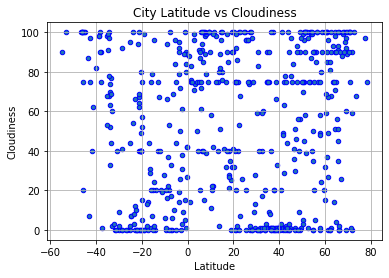

In [13]:
#Latitude vs Cloudiness Plot
fig, ax = plt.subplots()
cities_clean.plot(kind='scatter', x='Lat', y='Cloud Coverage', ax=ax, edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness" )
# Turn on the grid
ax.grid()

plt.savefig('Lat_Cloud.png')

plt.show()

This scatterplot depicts the relationship between Latitude and Cloudiness. While once again there does not seem to be a strong correlation between Latitude and Cloudiness,  the most common cloudiness values for cities seem to be 0, 40, approximately 80 and 100.  This may bbe because latitude does not influence the cloudiness of cities, or it may just be an anomlay based on they day the data was gathered. 

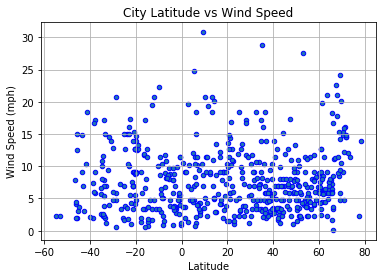

In [14]:
#Latitude vs Wind Speed Plot 
fig, ax = plt.subplots()
cities_clean.plot(kind='scatter', x='Lat', y='Wind Speed', ax=ax, edgecolors='b')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed" )
# Turn on the grid
ax.grid()

plt.savefig('Lat_Wind.png')

plt.show()

The scatterplot shows the relationship between Latitude and Wind speed. Once again, there does not seem to be a clear relationship between the two variables. Thus, once again latitude does not seem to influence wind speed. 

In [15]:
#Northern Hemisphere vs Southern Hemisphere database- created using the loc command 
northern_hemisphere=cities_clean.loc[cities_clean["Lat"]>=0]
southern_hemisphere=cities_clean.loc[cities_clean["Lat"]<0]


Line equation is y = -0.48x + 89.49
The correlation coefficient is -0.6656827326642245


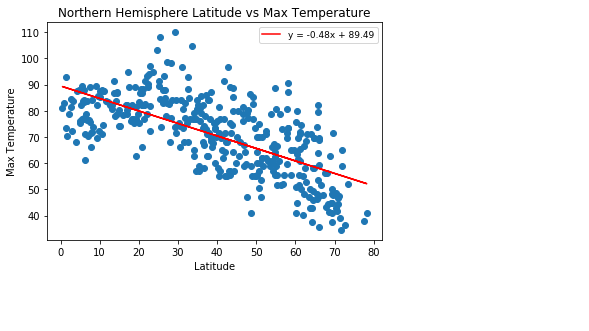

In [16]:
#Northern Hemisphere Lat v Max Temp

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
print(f'The correlation coefficient is {rvalue}')

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",label=line_eq)
plt.legend(fontsize=9)

plt.annotate(line_eq,(60,1),fontsize=30,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere Latitude vs Max Temperature')
plt.savefig('North_Lat_Max.png')

plt.show()

Line equation is y = 0.8x + 80.92
The correlation coefficient is 0.7799877787364731


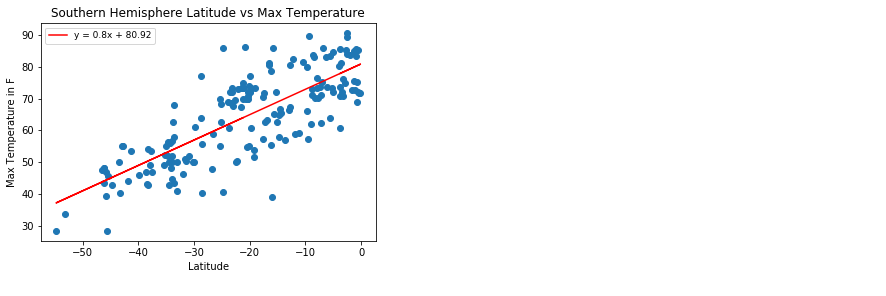

In [17]:


x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
print(f'The correlation coefficient is {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",label=line_eq)
plt.legend(fontsize=9)

plt.annotate(line_eq,(47,12),fontsize=30,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in F')
plt.title('Southern Hemisphere Latitude vs Max Temperature')
plt.savefig('South_Lat_Max.png')

plt.show()

As shown by the scatterplots and linear regression model above, in the Northern Hemisphere there is a reasonably strong negative correlation (-0.71) between latitiude and maximum temperature while in the Southern Hemisphere there is a reasonably strong positive correlation (0.80) between latitude and maximum temperature. This is fairly intutive, as cities that are closer to the equator (latitiude of 0), would usually be hotter and have a higher maximum temperature. As cities become further away from the equator, their maximum temperature drops. This relationship was similarly seen in the latitude and maximum temperature scatterplot above. 

Line equation is y = -0.04x + 70.19
The correlation coefficient is -0.031330943640968306


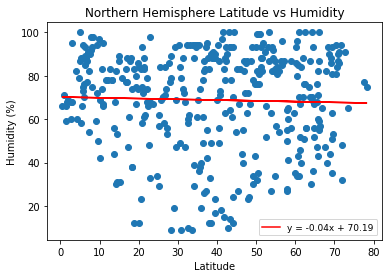

In [18]:

x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
print(f'The correlation coefficient is {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",label=line_eq)
plt.legend(fontsize=9)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.savefig('Northern_Lat_Humidity.png')

plt.show()

Line equation is y = -0.05x + 72.05
The correlation coefficient is -0.031552025807124615


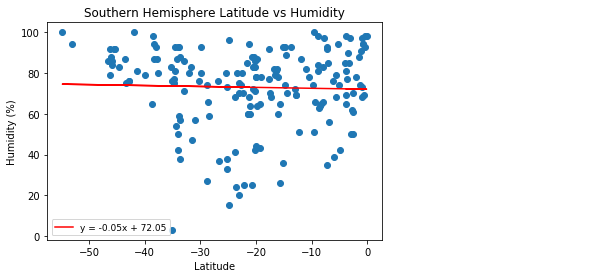

In [19]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
print(f'The correlation coefficient is {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",label=line_eq)
plt.legend(fontsize=9)

plt.annotate(line_eq,(15,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.savefig('Southern_Lat_Humidity.png')

plt.show()

As shown by the scatterplots above, there is a slightly negative relationship between latitude and humidity in both the Northern and Southern Hemisphere. However, the correlation between latitiude and humidity is weak in both the Northern and Southern Hemisphere, at -0.09 and -0.127 respectively. This is similarly supported by the scatterplot of humidity and latitidue abov where not clear correlation was shown between the two variables.    

Line equation is y = 0.02x + 53.51
The correlation coefficient is 0.008357384355033914


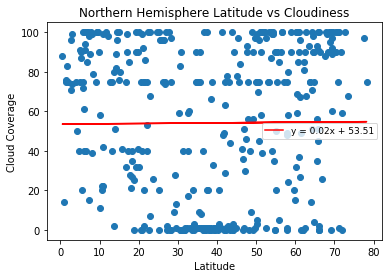

In [20]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloud Coverage']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
print(f'The correlation coefficient is {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",label=line_eq)
plt.legend(fontsize=9)
plt.xlabel('Latitude')
plt.ylabel('Cloud Coverage')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.savefig('Northern_Lat_Cloud.png')

plt.show()

Line equation is y = -0.75x + 29.2
The correlation coefficient is -0.2799542146896295


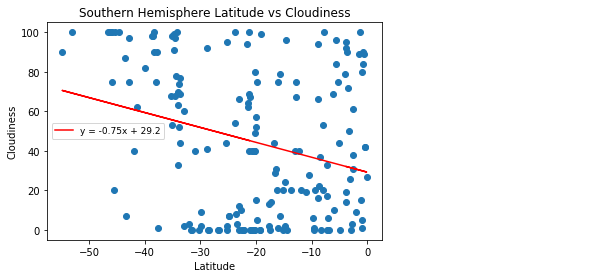

In [21]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloud Coverage']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
print(f'The correlation coefficient is {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",label=line_eq)
plt.legend(fontsize=9)

plt.annotate(line_eq,(15,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.savefig('Southern_Lat_Cloud.png')

plt.show()

The correlation between cloudiness and the latitiude in the Northern Hemipshere is almost 0. However, in the Southern hemisphere, the correlation is slightly stronger and negative (-0.17). The reason for this stronger correlation in the southern hemisphere compared to the Northern Hemisphere may be because of the time the measurements were taken. 

Line equation is y = 0.01x + 7.49
The correlation coefficient is 0.035107077201125374


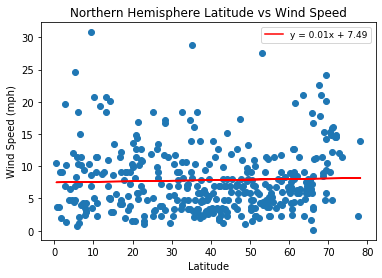

In [22]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
print(f'The correlation coefficient is {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",label=line_eq)
plt.legend(fontsize=9)


plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.savefig('Northern_Lat_Wind.png')

plt.show()


Line equation is y = -0.03x + 6.91
The correlation coefficient is -0.0786225282186832


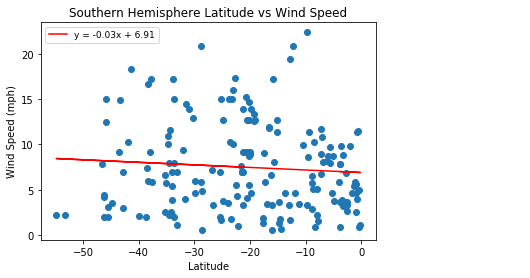

In [23]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) 

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Line equation is {line_eq}")
print(f'The correlation coefficient is {rvalue}')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-",label=line_eq)
plt.legend(fontsize=9)


plt.annotate(line_eq,(5,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.savefig('Southern_Lat_Wind.png')
plt.show()


There does not seem to be a strong correlation between Wind speed and Latitude in both the Northern and Southern Hemisphere. The reason for this may be because Latitiude does not have an effect on wind speed in either Hemisphere. Similar results were supported by the earlier scatterplot of Latitiude vs Wind Speed. 